In [5]:
import qiskit
from qiskit.circuit import QuantumCircuit,QuantumRegister,ClassicalRegister,AncillaRegister,Qubit,Reset
from Steane import SteaneEncoder,SteaneSyndromeDetector,SteaneSyndromeCorrector,SteaneErrorCorrector,SteaneFaultTolerantGates
from qiskit.circuit.library import HGate,XGate,SGate,ZGate,CXGate

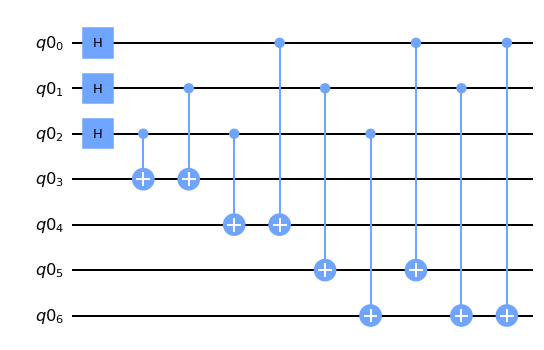

In [2]:
e = SteaneEncoder()
circuit = e.createEncoderCircuit(1)
circuit = circuit.decompose()
circuit.draw("mpl")

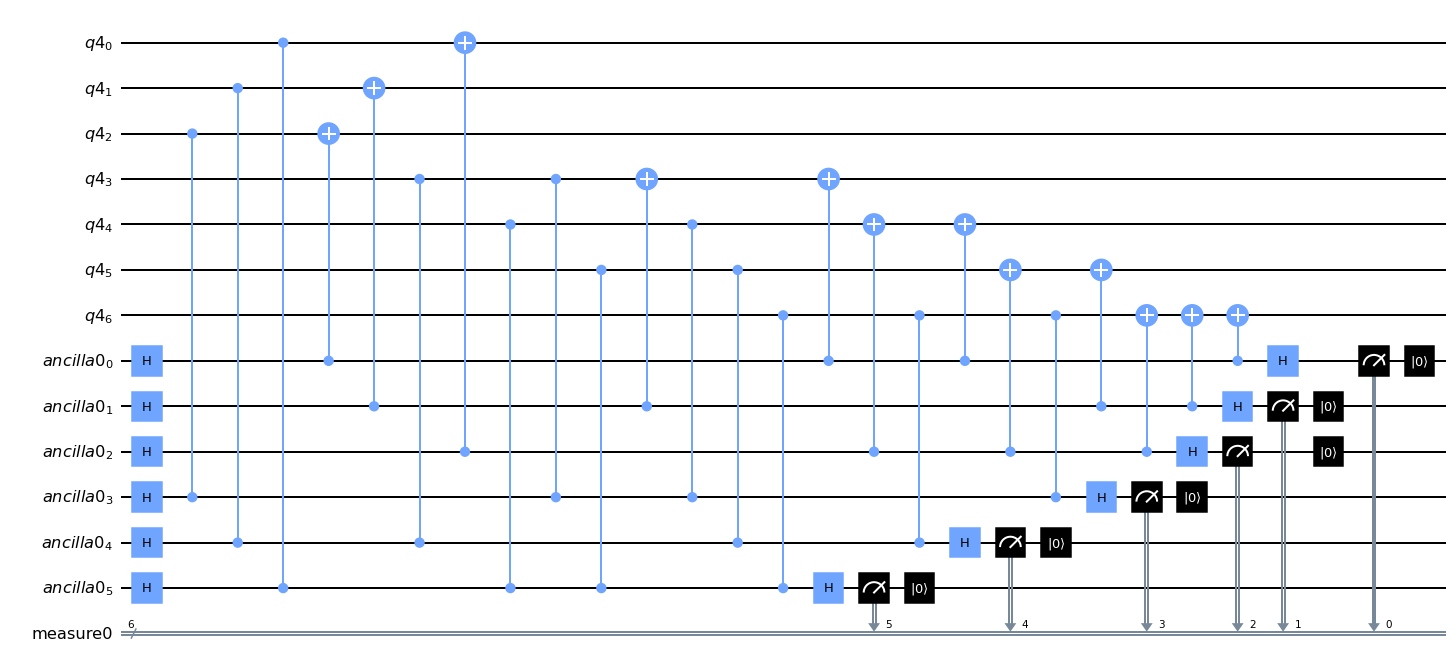

In [3]:
sd = SteaneSyndromeDetector()
qreg = QuantumRegister(7)
circuit = QuantumCircuit(qreg)
circuit = sd.syndromeDetectCircuit(circuit, [qreg])
circuit = circuit.decompose()
circuit.draw("mpl",fold=200)

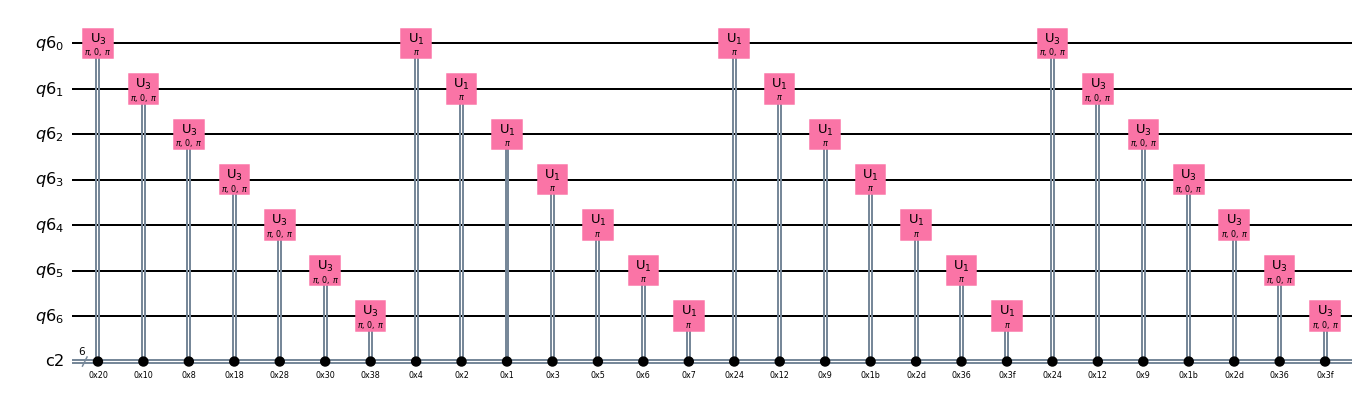

In [4]:
sc = SteaneSyndromeCorrector()
qreg = QuantumRegister(7)
creg = ClassicalRegister(6)
circuit = QuantumCircuit(qreg,creg)
circuit = sc.syndromeCorrectCircuit(circuit, [qreg],[creg])
circuit = circuit.decompose()
circuit.draw("mpl",fold=200)

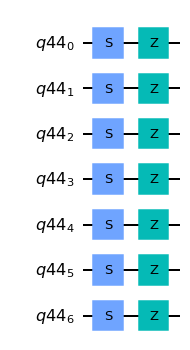

In [6]:
sg = SteaneFaultTolerantGates()
qreg = QuantumRegister(7)
circuit = QuantumCircuit(qreg)
circuit = sg.addGateCircuit(circuit,SGate(),[[qreg]])
circuit = circuit.decompose()
circuit.draw("mpl",fold=200)

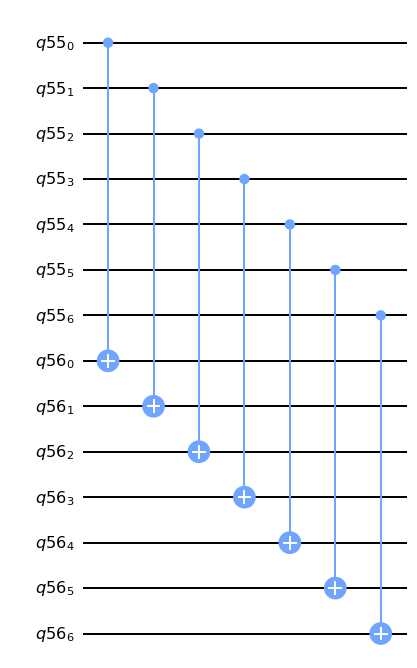

In [7]:
sg = SteaneFaultTolerantGates()
qreg = QuantumRegister(7)
qreg2 = QuantumRegister(7)
circuit = QuantumCircuit(qreg,qreg2)
circuit = sg.addGateCircuit(circuit,CXGate(),[[qreg],[qreg2]])
circuit = circuit.decompose()
circuit.draw("mpl",fold=200)

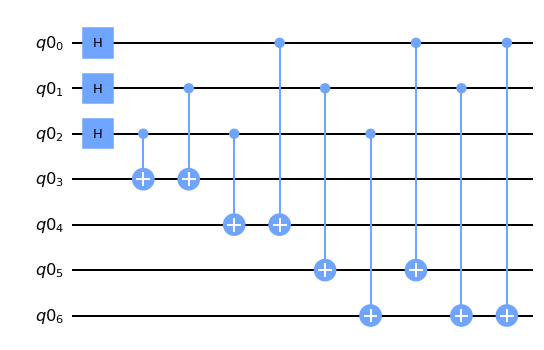

In [3]:
circuit2 = circuit.decompose()
circuit2.draw("mpl")

In [13]:
ftg = SteaneFaultTolerantGates()
circuit = ftg.addGateCircuit(circuit, HGate(), [circuit.qregs[:1]])
circuit = ftg.addGateCircuit(circuit, XGate(), [circuit.qregs[:1]])
circuit = ftg.addGateCircuit(circuit, SGate(), [circuit.qregs[:1]])
circuit.draw("mpl")
#circuit.h(circuit.qregs[0][3])

NameError: name 'XGate' is not defined

In [5]:
se = SteaneErrorCorrector()
circuit = se.errorCorrectCircuit(circuit, circuit.qregs)
#circuit.draw("mpl")

In [6]:
circuit2 = circuit.decompose()
#circuit2.draw("mpl")

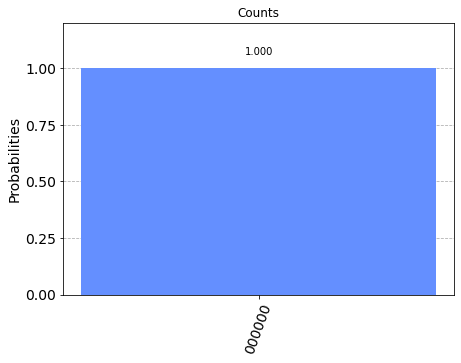

In [7]:
from qiskit import Aer,transpile
from qiskit.compiler import assemble
from qiskit.visualization import plot_histogram

simulator = Aer.get_backend('qasm_simulator')
circuit2 = transpile(circuit, simulator)
qobj = assemble(circuit2)

result = simulator.run(qobj).result()
plot_histogram(result.get_counts(), title='Counts')

In [8]:
circuit = se.errorCorrectCircuit(circuit,circuit.qregs[:1],circuit.cregs,circuit.qregs[1:])
#circuit.draw("mpl")

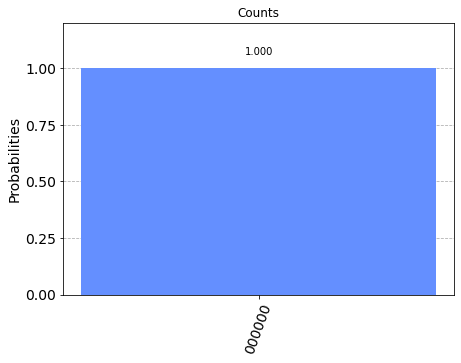

In [9]:
circuit2 = transpile(circuit, simulator)
qobj = assemble(circuit2)

result = simulator.run(qobj).result()
plot_histogram(result.get_counts(), title='Counts')